# Preliminaries

## Objective

Minimal example for an optimisation via genetic algorithm.

## References
- https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/
- S. Russell and P. Norvig, Artificial Intelligence A Modern Approach, third edition, p.129

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Settings

In [2]:
SEED = 42

N_POP = 10      # population size (with 4 orders, there are only 16 binary combinations)
N_BITS = 10     # lenght of an individual
N_GEN = 50      # number of generations
N_COMP = 3      # number of other individuals each population member is compared to during selection
P_CROSS = 0.3   # crossover probability
P_MUT = 0.05    # mutation probability, could be set to 1/n_bits

In [3]:
assert N_POP % 2 == 0, "population size must be even"

# Genetic algorithm

## Dummy population

An individual is represented by a bit string of the form `[1, 0, 0, 0, 1, 0, 0, 0, 0, 1]`. We start by creating a population.

In [4]:
# np.random.seed(SEED)
# pop = np.array([np.random.randint(0, 2, N_BITS).tolist() for _ in range(N_POP)])
# pop

In [5]:
pop = np.zeros((N_POP, N_BITS))
pop

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
for i in range(3):
    row, col = np.random.randint(0, N_POP), np.random.randint(0, N_BITS)
    pop[row, col] = 1
pop

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

## Dummy fitness

For this simply demonstration, we define the *fitness* as the sum over an individual vector. The optimum solution thus is trivially equal to the length of the individual vectors.

In [7]:
def objective(individual):
    """
    trivial fitness score
    """
    fitness = individual.sum()
    return fitness

In [8]:
scores = np.array([objective(ind) for ind in pop])
scores

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])

## Selection
Choose a random individual from the population and compare its score again N_COMP other random individuals and keep the one with the highest score. Do this N_POP times to select a new set of individuals.

In [9]:
def selection(pop, scores, k=N_COMP):
    selection_idx = np.random.randint(len(pop)) # select a random individual
    # compare to k other random indivuduals and keep the one with the best score
    for idx in np.random.randint(0, len(pop), k):
        if scores[idx] > scores[selection_idx]:
            selection_idx = idx
    return pop[selection_idx]

In [10]:
np.array([selection(pop, scores) for _ in range(N_POP)])

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Crossover

In [11]:
def crossover(ind1, ind2, p_cross=P_CROSS):
    if np.random.rand() < p_cross:
        split_index = np.random.randint(1, len(ind1)-1)
        ind1 = np.concatenate((ind1[:split_index], ind2[split_index:]))
        ind2 = np.concatenate((ind2[:split_index], ind1[split_index:]))
    return [ind1, ind2]

In [12]:
ind1 = pop[0]
ind2 = pop[1]

print(ind1)
print(ind2)

new_ind1, new_ind2 = crossover(ind1, ind2)

print("after crossover")
print(new_ind1)
print(new_ind2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
after crossover
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Mutation

In [13]:
def mutation(ind, p_mut=P_MUT):
    mut_ind = np.array([not x if np.random.rand() < p_mut else x for x in ind]).astype(int)
    return mut_ind

In [14]:
for i in range(10):
    mut_ind = mutation(ind1)
    print(ind1, "->", mut_ind, "\n")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0 0 0 0 0 0 0 0 0 1] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0 0 0 0 0 0 0 0 0 0] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0 0 0 0 0 0 0 0 0 0] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1 0 0 0 0 0 0 0 0 0] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0 0 0 0 0 0 0 0 0 0] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0 0 0 0 0 0 0 0 0 0] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0 0 0 0 0 0 0 0 0 0] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0 0 0 0 0 0 0 0 0 0] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1 0 0 0 0 0 0 0 0 0] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0 0 0 0 0 0 0 0 0 1] 



## Create the next generation

In [15]:
def next_generation(pop, scores):
    children = []
    selected = np.array([selection(pop, scores) for _ in range(N_POP)])
    for i in range(0, N_POP, 2):
        parent1, parent2 = selected[i], selected[i+1]
        for c in crossover(parent1, parent2):
            children.append(mutation(c))

    return np.array(children)

In [16]:
next_generation(pop, scores)

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

## Evolution

In [17]:
best_score = []
best_ind = []

for gen in range(N_GEN):
    # calculate scores for the current generation
    scores = np.array([objective(ind) for ind in pop])
    # update population and scores for the next generation
    pop = next_generation(pop, scores)
    scores = np.array([objective(ind) for ind in pop])
    
    best_score.append(scores[scores.argmax()])
    best_ind.append(pop[scores.argmax()])
    if gen % 10 == 0:
        print(f"Generation {gen} out of {N_GEN}: best score {scores[scores.argmax()]}")

print(f"\nBest score: {best_score[np.array(best_score).argmax()]}")
print(f"Best configureation: {np.array(best_ind)[np.array(best_score).argmax()]}")

Generation 0 out of 50: best score 2
Generation 10 out of 50: best score 8
Generation 20 out of 50: best score 10
Generation 30 out of 50: best score 10
Generation 40 out of 50: best score 10

Best score: 10
Best configureation: [1 1 1 1 1 1 1 1 1 1]


# Evaluation

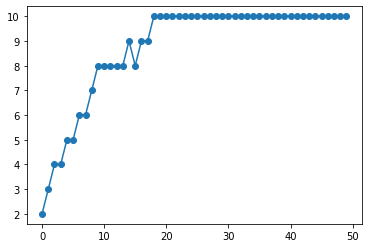

In [18]:
plt.plot(best_score, 'o-');